In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
df=pd.read_csv("aspiring_minds_employability_outcomes_2015.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:

df.head()

Unnamed: 0      ID   Salary               DOJ               DOL  \
0      train  203097   420000  01-06-2012 00:00           present   
1      train  579905   500000  01-09-2013 00:00           present   
2      train  810601   325000  01-06-2014 00:00           present   
3      train  267447  1100000  01-07-2011 00:00           present   
4      train  343523   200000  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697 

In [5]:
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [7]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       GraduationYear      English      Logical        Quant       Domain  \
count     3998.000000  3998.000000  3998.000000  3998.000000  3998.000000   
mean      2012.105803   501.649075   501.598799   513.378189     0.510490   
std         31.857271   104.940021    86.783297   122.302332     0.468671   
min          0.000000   180.000000   195.000000   120.000000    -1.000000   
25%       2012.000000   425.000000   445.000000   430.000000     0.342315   
50%       2013.000000   500.000000   505.000000   515.000000     0.622643   
75%       2014.000000   570.000000   565.000000   595.000000     0.842248   
max       2017.000000   875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          3998.000000            3998.000000      3998.000000   
mean            353.102801              95.328414        90.742371   
std             205.355519             158.241218       175.273083   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             840.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     3998.000000     3998.000000  3998.000000  3998.000000   
mean        22.974737       16.478739    31.851176     2.683842   
std         98.123311       87.585634   104.852845    36.658505   
min         -1.000000       -1.000000    -1.000000    -1.000000   
25%         -1.000000       -1.000000    -1.000000    -1.000000   
50%         -1.000000       -1.000000    -1.000000    -1.000000   
75%         -1.000000       -1.000000    -1.000000    -1.000000   
max        623.000000      676.000000   548.000000   516.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3998.000000    3998.000000   3998.000000  3998.000000   
mean           -0.037831       0.146496      0.002763    -0.169033   
std             1.028666       0.941782      0.951471     1.007580   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.713525      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.535400     3.352500   

       openess_

# Data Cleaning

In [8]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
#consider column Designation
l=[]
for i in df['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')

In [10]:
df['Designation']=l
df['Designation'].value_counts()

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designation, dtype: int64

In [11]:
#consider column 12 board
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate s

In [12]:
df.loc[df['12board']=="central board of secondary education",'12board'] = "cbse"

In [13]:
se = pd.Series(["cbse","icse"])
df.loc[-df['12board'].isin(se), '12board'] = 'state board'

In [14]:
df['12board'].value_counts()

state board    2457
cbse           1412
icse            129
Name: 12board, dtype: int64

In [15]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [16]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [17]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [18]:
#Replace them with their alternatives
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [19]:
df['Specialization'] = df['Specialization'].map(specialization_map)

In [20]:
df['Specialization'].value_counts()

CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: Specialization, dtype: int64

# Finding and removing Outliers

C:\Users\akshat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akshat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10percentage'>

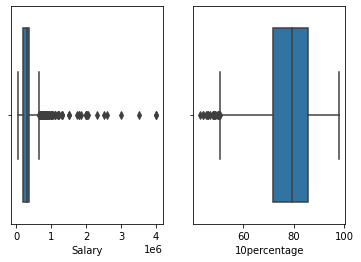

In [21]:
#by plotting box plot we can easily find that whether outlier is present or not
plt.subplot(1,2,1)
sns.boxplot(df['Salary'])

plt.subplot(1,2,2)
sns.boxplot(df['10percentage'])

#as it is cleary visible that there are many outliers in columns

<b>Removing outliers using IQR

In [22]:
#to remove outliers 
def no_outt(df,ft):
    q1=df[ft].quantile(.25)
    q3=df[ft].quantile(.75)

    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+1.5*IQR
    
    lst=df.index[(df[ft]<lower_limit)|(df[ft]>upper_limit)]
    return lst

In [23]:
index_list=[]
for f in ['10percentage','12percentage','Salary']:
    index_list.extend(no_outt(df,f))

In [24]:
def remove(df1,ft): #defining function to remove outlier in columns
  
    df1=df.drop(ft)
    return df1

In [25]:
df2=remove(df,index_list)  
df2.shape

(3858, 39)

In [26]:
df2.describe()

ID         Salary  10percentage  12graduation  12percentage  \
count  3.858000e+03    3858.000000   3858.000000   3858.000000   3858.000000   
mean   6.717340e+05  286101.347849     78.087431   2008.135303     74.539728   
std    3.603852e+05  126500.741038      9.529759      1.614956     10.933814   
min    1.124400e+04   35000.000000     51.000000   1995.000000     43.000000   
25%    3.376028e+05  180000.000000     72.000000   2007.000000     66.200000   
50%    6.431185e+05  300000.000000     79.200000   2008.000000     74.400000   
75%    9.959570e+05  360000.000000     85.650000   2009.000000     82.600000   
max    1.298275e+06  655000.000000     97.120000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3858.000000  3858.000000  3858.000000    3858.000000      3858.000000   
mean    5211.847589     1.932089    71.467996    5211.847589         0.299378   
std     4811.615562     0.251625     8.079462    4811.615562         0.458045   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      505.750000     2.000000    66.500000     505.750000         0.000000   
50%     3932.500000     2.000000    71.700000    3932.500000         0.000000   
75%     8819.000000     2.000000    76.285000    8819.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       GraduationYear      English      Logical        Quant       Domain  \
count     3858.000000  3858.000000  3858.000000  3858.000000  3858.000000   
mean      2012.117678   501.115863   501.446086   512.328409     0.507953   
std         32.428796   104.793204    86.278686   121.371154     0.467299   
min          0.000000   180.000000   195.000000   120.000000    -1.000000   
25%       2012.000000   425.000000   445.000000   430.000000     0.342315   
50%       2013.000000   500.000000   505.000000   515.000000     0.622643   
75%       2014.000000   570.000000   565.000000   595.000000     0.837621   
max       2017.000000   875.000000   795.000000   900.000000     0.999910   

       ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
count          3858.000000            3858.000000      3858.000000   
mean            352.736651              95.849922        92.134785   
std             204.597329             158.487986       176.191332   
min              -1.000000              -1.000000        -1.000000   
25%             295.000000              -1.000000        -1.000000   
50%             415.000000              -1.000000        -1.000000   
75%             495.000000             233.000000        -1.000000   
max             840.000000             612.000000       715.000000   

       MechanicalEngg  ElectricalEngg  TelecomEngg    CivilEngg  \
count     3858.000000     3858.000000  3858.000000  3858.000000   
mean        22.406947       16.863142    32.430793     2.178331   
std         96.882301       88.465177   105.746254    33.496870   
min         -1.000000       -1.000000    -1.000000    -1.000000   
25%         -1.000000       -1.000000    -1.000000    -1.000000   
50%         -1.000000       -1.000000    -1.000000    -1.000000   
75%         -1.000000       -1.000000    -1.000000    -1.000000   
max        623.000000      676.000000   548.000000   516.000000   

       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3858.000000    3858.000000   3858.000000  3858.000000   
mean           -0.031461       0.144741      0.001247    -0.165649   
std             1.029069       0.943414      0.953498     1.010023   
min            -4.126700      -5.781600     -4.600900    -2.643000   
25%            -0.589900      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.315400     3.352500   

      

In [27]:
df2.corr()

ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.307004      0.045945      0.671795   
Salary                -0.307004  1.000000      0.280512     -0.151234   
10percentage           0.045945  0.280512      1.000000      0.265317   
12graduation           0.671795 -0.151234      0.265317      1.000000   
12percentage           0.009333  0.278353      0.640550      0.255503   
CollegeID              0.280657 -0.153298      0.019334      0.249953   
CollegeTier            0.023067 -0.176437     -0.115102      0.013685   
collegeGPA             0.052975  0.200220      0.311095      0.094380   
CollegeCityID          0.280657 -0.153298      0.019334      0.249953   
CollegeCityTier       -0.035277  0.036056      0.121871     -0.002199   
GraduationYear         0.026372 -0.014726     -0.014508      0.013176   
English                0.144126  0.249977      0.346370      0.155038   
Logical                0.109591  0.245488      0.304078      0.107622   
Quant                 -0.048403  0.344925      0.309666      0.004797   
Domain                -0.121633  0.154921      0.075724     -0.034223   
ComputerProgramming    0.025883  0.162682      0.047601     -0.043686   
ElectronicsAndSemicon -0.117775  0.026758      0.086158     -0.009472   
ComputerScience        0.480031 -0.135713     -0.020912      0.287382   
MechanicalEngg        -0.017806  0.001721      0.052922      0.047075   
ElectricalEngg         0.100387 -0.050894      0.079754      0.123375   
TelecomEngg           -0.054672 -0.005151      0.053369      0.016278   
CivilEngg             -0.003873  0.024874      0.022992      0.007064   
conscientiousness      0.176546 -0.057683      0.074739      0.106317   
agreeableness          0.025524  0.058708      0.131756      0.039974   
extraversion           0.121775 -0.033000     -0.002204      0.061754   
nueroticism           -0.156255 -0.052010     -0.126252     -0.086513   
openess_to_experience  0.031211 -0.012341      0.036888     -0.020880   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                         0.009333   0.280657     0.023067    0.052975   
Salary                     0.278353  -0.153298    -0.176437    0.200220   
10percentage               0.640550   0.019334    -0.115102    0.311095   
12graduation               0.255503   0.249953     0.013685    0.094380   
12percentage               1.000000   0.021410    -0.096516    0.348970   
CollegeID                  0.021410   1.000000     0.066977    0.019355   
CollegeTier               -0.096516   0.066977     1.000000   -0.079414   
collegeGPA                 0.348970   0.019355    -0.079414    1.000000   
CollegeCityID              0.021410   1.000000     0.066977    0.019355   
CollegeCityTier            0.130088   0.005791    -0.100245    0.018440   
GraduationYear            -0.013187  -0.000674    -0.005820    0.009075   
English                    0.207211  -0.020475    -0.180206    0.103711   
Logical                    0.233499  -0.044094    -0.175125    0.197617   
Quant                      0.307605  -0.109406    -0.239819    0.210767   
Domain                     0.072148  -0.070843    -0.053220    0.107671   
ComputerProgramming        0.077146  -0.033191    -0.078740    0.142157   
ElectronicsAndSemicon      0.117276  -0.022096    -0.036325    0.021778   
ComputerScience           -0.043197   0.098734    -0.010016    0.009116   
MechanicalEngg             0.042962  -0.006972    -0.008799   -0.031557   
ElectricalEngg             0.066861   0.021503     0.008050    0.053627   
TelecomEngg                0.045104   0.023827    -0.009716   -0.002857   
CivilEngg                  0.013122   0.019440    -0.023233   -0.025921   
conscientiousness          0.060844   0.074358     0.051178    0.069044   
agreeableness              0.098653  -0.006778    -0.033865    0.066379   
extraversion              -0.006077   0.004743     0.013290   -0.035340   
nueroticism               -0.08940

<AxesSubplot:>

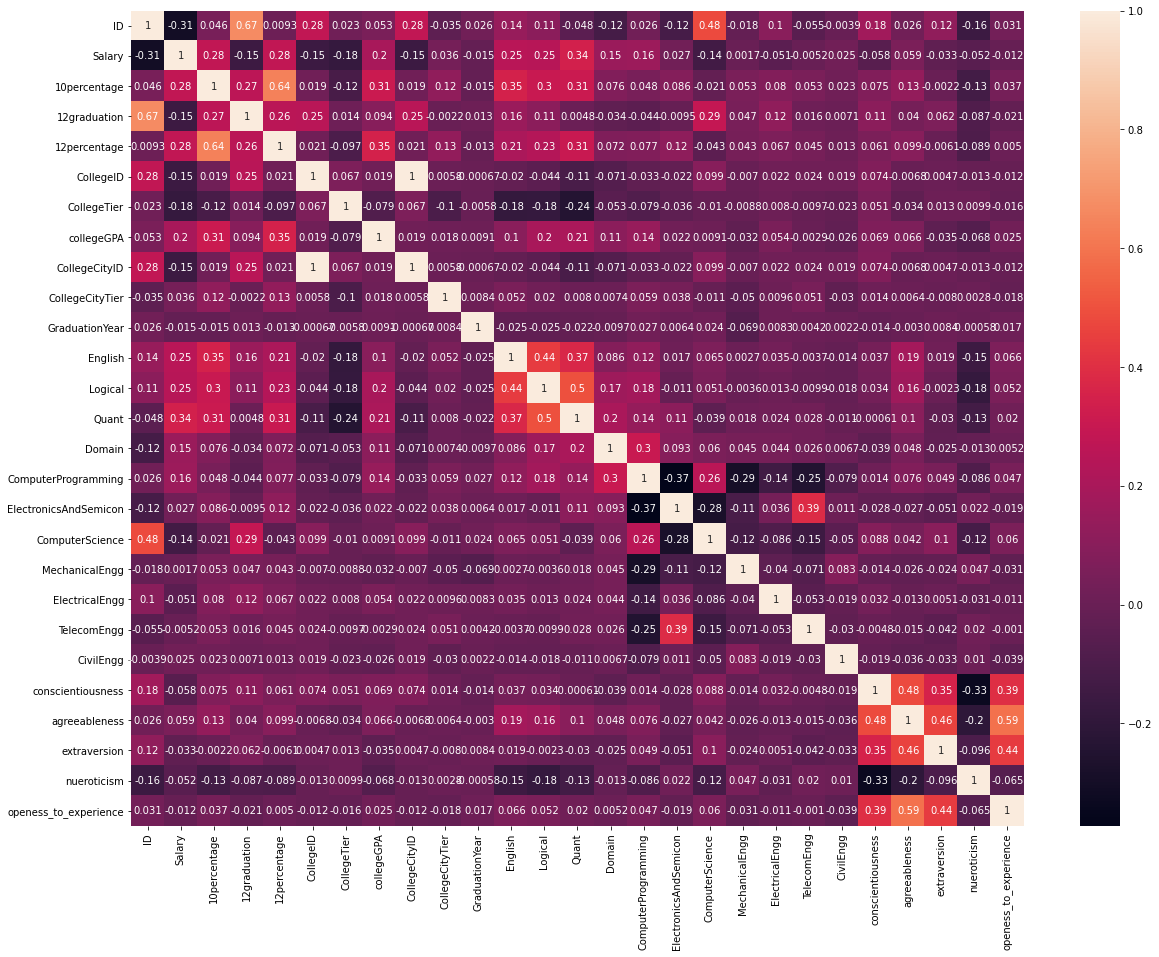

In [28]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr(method='pearson'), annot = True)

<b>HeatMaps: 
    
    Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps

In [29]:
#dropping some uncessary columns
df2.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [30]:
df2.shape

(3858, 39)

In [31]:
df2.drop(columns=[ 'DOL', 'Designation', 'JobCity','CollegeTier',  
       'CollegeCityTier', '10board','CollegeState','ElectronicsAndSemicon',
        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [32]:
df2.shape

(3858, 27)

In [33]:
df2.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'Gender', 'DOB', '10percentage',
       '12graduation', '12percentage', '12board', 'CollegeID', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [34]:
df2=df2.drop(columns=['Unnamed: 0',])

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858 entries, 0 to 3997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3858 non-null   int64  
 1   Salary                 3858 non-null   int64  
 2   DOJ                    3858 non-null   object 
 3   Gender                 3858 non-null   object 
 4   DOB                    3858 non-null   object 
 5   10percentage           3858 non-null   float64
 6   12graduation           3858 non-null   int64  
 7   12percentage           3858 non-null   float64
 8   12board                3858 non-null   object 
 9   CollegeID              3858 non-null   int64  
 10  Degree                 3858 non-null   object 
 11  Specialization         3858 non-null   object 
 12  collegeGPA             3858 non-null   float64
 13  CollegeCityID          3858 non-null   int64  
 14  GraduationYear         3858 non-null   int64  
 15  Engl

In [36]:
df2['GraduationYear'].value_counts()

2013    1158
2014    1017
2012     827
2011     475
2010     256
2015      87
2009      21
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [37]:
df2.to_csv("cleaned.csv")

# Data Visualization

In [38]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Salary'>

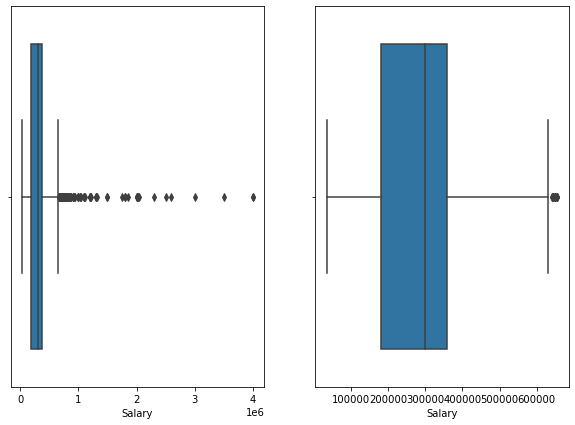

In [39]:
#lets consider salary with and without outlier
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(df['Salary'])

plt.subplot(1,2,2)
sns.boxplot(df2['Salary'])
#We have almost removed all outliers

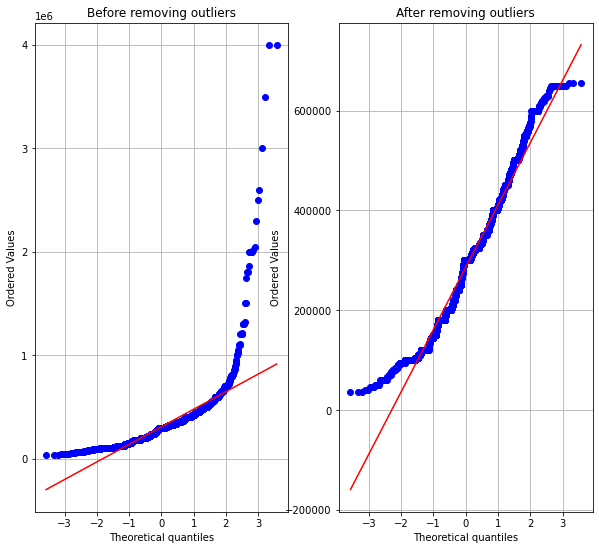

In [40]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
stats.probplot(df['Salary'],dist='norm',plot=plt)
plt.title("Before removing outliers")
plt.grid()
plt.subplot(1,2,2)
stats.probplot(df2['Salary'],dist='norm',plot=plt)
plt.title("After removing outliers")
plt.grid()


In [41]:
df2['Salary'].mode()

0    300000
dtype: int64

# Observations

There are many outliers in Salary coulumn we have remove it using IQR method

Most of people Earning salary of 300000

Salary about 65500 may act as outlier

In [42]:
#consider another column
df2['Gender'].value_counts()

m    2923
f     935
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

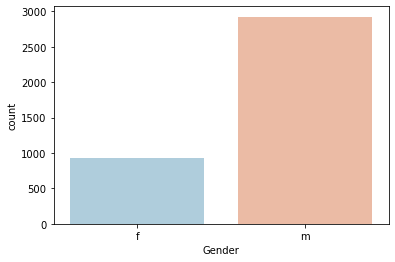

In [43]:
sns.countplot(x='Gender',data=df2,palette='RdBu_r')

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

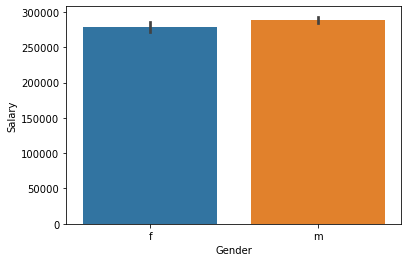

In [44]:
sns.barplot(x='Gender', y = 'Salary', data=df2)

<AxesSubplot:xlabel='Specialization', ylabel='count'>

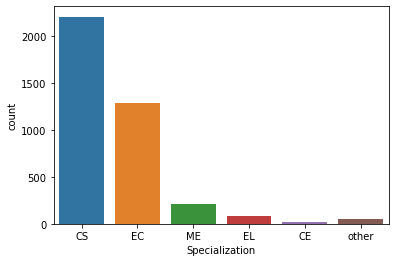

In [45]:
sns.countplot(x='Specialization',data=df2)

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

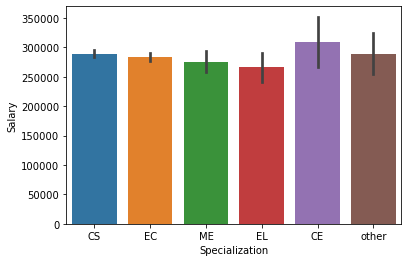

In [46]:
sns.barplot(x='Specialization',y='Salary',data=df2)

Text(0.5, 0.98, 'Salary levels by specialization')

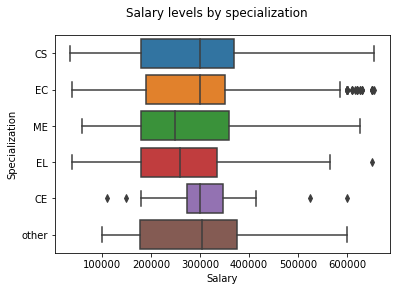

In [47]:
#as it is cleary visible that there are some outlier in EC and CE
sns.boxplot(x='Salary', y = 'Specialization', data=df2)
plt.suptitle('Salary levels by specialization')


<AxesSubplot:xlabel='CollegeCityTier', ylabel='Salary'>

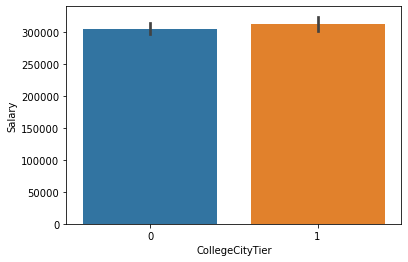

In [48]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df) 

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

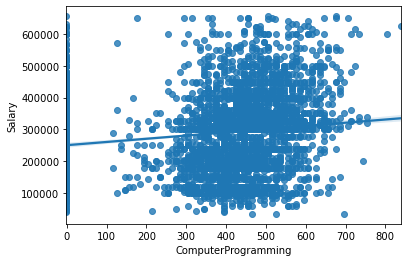

In [49]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=df2)

<b>positive correlation between salary and computer programming skills

Text(0.5, 0.98, 'Salary vs 12Board')

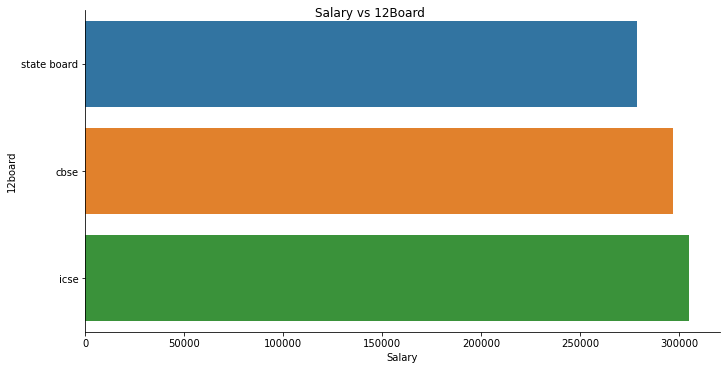

In [51]:
sns.factorplot(x='Salary', y='12board', kind='bar', data=df2, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')


# Observation

salaries of people from icse board are comparatively high

Text(0.5, 0.98, 'Salary vs Degree')

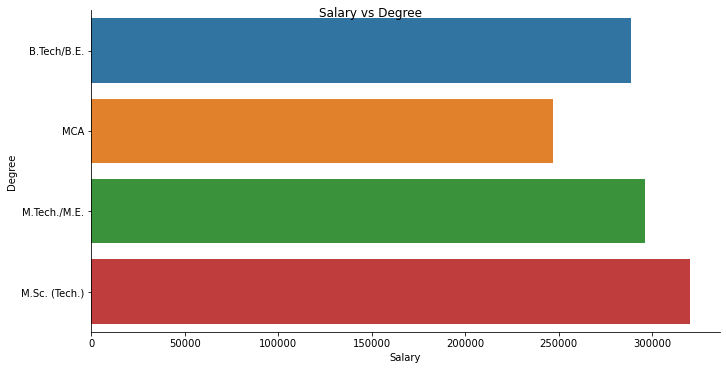

In [52]:
sns.factorplot(x='Salary', y='Degree', kind='bar', data=df2, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs Degree')

<b>People having Degree of Msc earns more than others

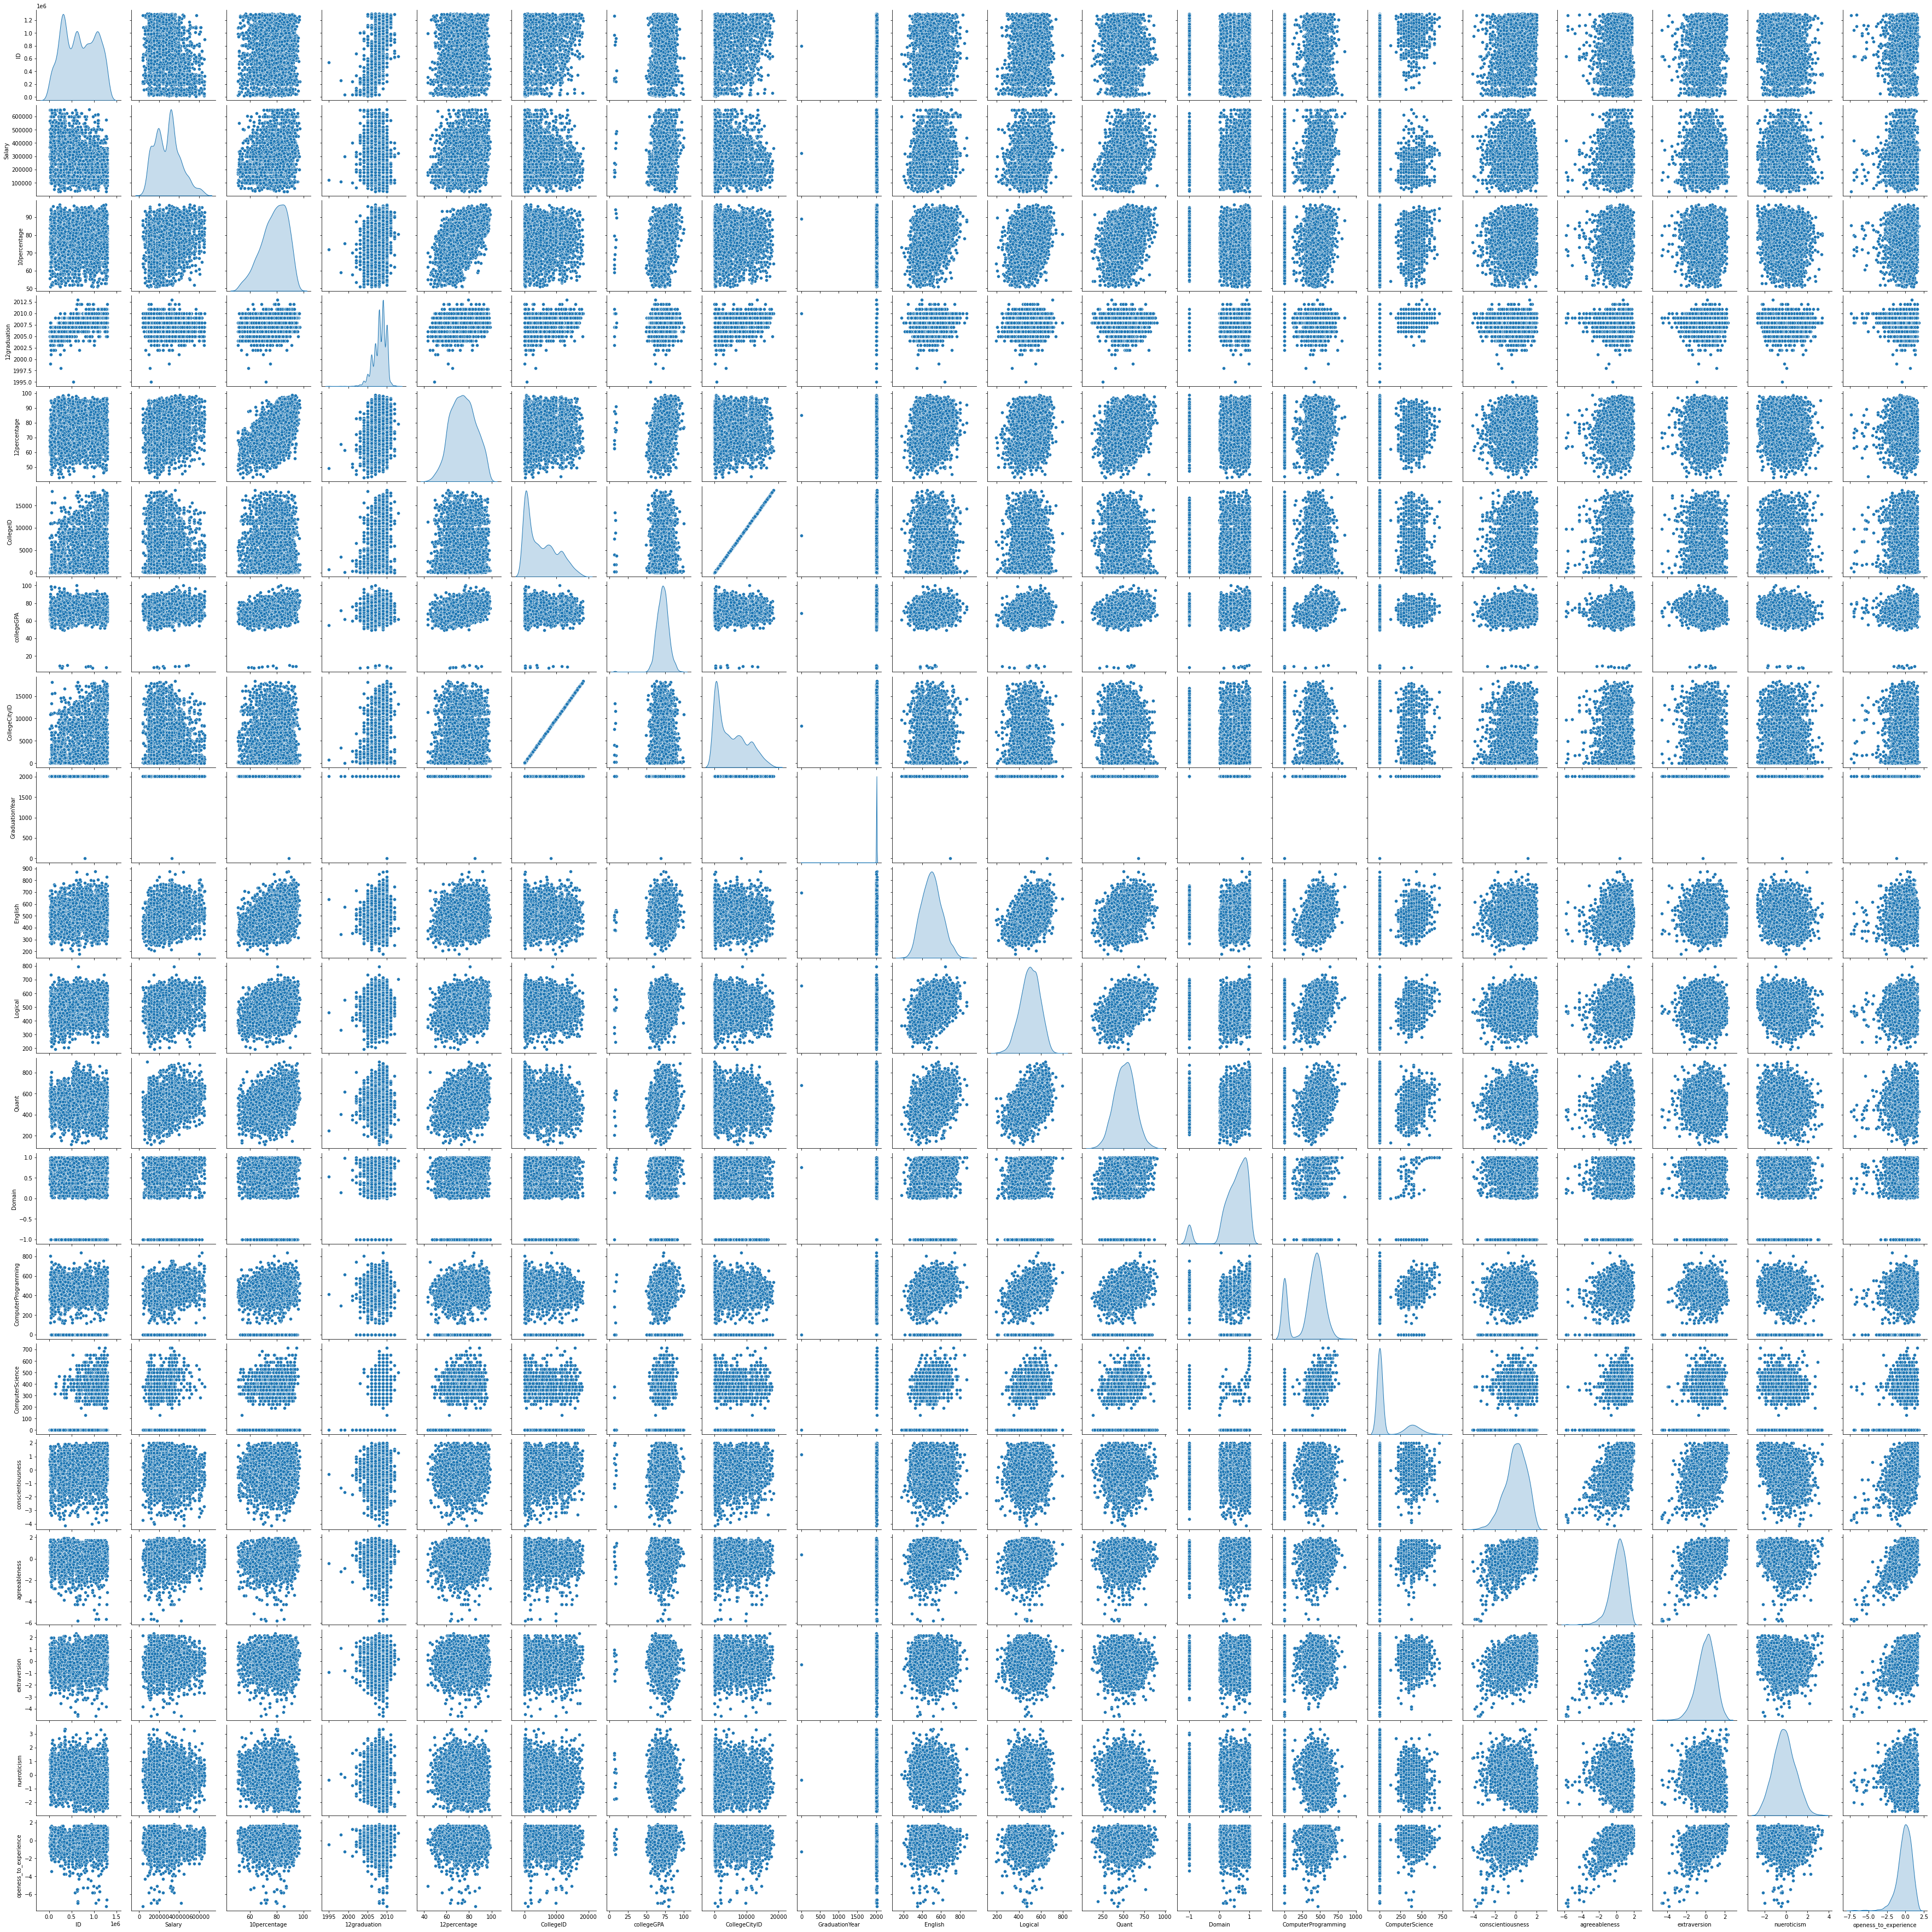

In [55]:
sns.pairplot(data = df2, diag_kind='kde')